# TP WGCNA

In [3]:
# Load WGCNA package
library(WGCNA)
# The following setting is important to import the data properly.
options(stringsAsFactors = FALSE)

In [4]:
# Loading of gene expression data
datGeneSummary=read.csv("TP_WGCNA/GeneSummaryTutorial.csv")
datTraits=read.csv("TP_WGCNA/TraitsTutorial.csv")
datGeneExpr=read.csv("TP_WGCNA/MicroarrayDataTutorial.csv")

In [5]:
head(datGeneSummary)

GeneName,truemodule,SignalGeneIndicator,p.Weighted,q.Weighted,Cor.Weighted,Z.Weighted,p.Standard,q.Standard,Cor.Standard,Z.Standard
Gene1,turquoise,0,0.9259005,0.999982,-0.0134934249,-0.093493701,0.9221159,0.9970105,-0.01418468,-0.09828426
Gene2,turquoise,0,0.9969814,0.999982,0.0005489092,0.003802955,0.5411428,0.9910637,0.08848892,0.61548369
Gene3,turquoise,0,0.9410470,0.999982,0.0107297703,0.074342309,0.8860780,0.9969623,0.02078479,0.14403234
Gene4,turquoise,0,0.9574198,0.999982,-0.0077465490,-0.053671276,0.8662114,0.9969623,-0.02444026,-0.16937771
Gene5,turquoise,0,0.9473075,0.999982,-0.0095886132,-0.066434915,0.6789285,0.9910637,0.06000278,0.41646182
Gene6,turquoise,0,0.9361247,0.999982,-0.0116274356,-0.080562683,0.4402172,0.9910637,-0.11163446,-0.77829107


In [20]:
head(datTraits)

ArrayName,Trait.y,Trait.MEblue,Trait.MEbrown,Trait.MEgreen,Trait.MEgrey,Trait.MEturquoise,MEyellow
Sample1,1,-0.02039079,0.06915985,-0.13874993,-0.06687707,-0.05038756,0.002085968
Sample2,1,0.01062292,0.24403639,0.01513903,-0.01593587,0.02762906,0.033323836
Sample3,1,-0.10936605,0.23282339,-0.15991830,0.07130966,-0.12103529,-0.003678822
Sample4,2,-0.07024973,-0.01402537,0.24508355,0.04663092,0.05266094,-0.046692130
Sample5,2,-0.20183345,-0.35221354,0.03421355,0.02949080,-0.07676831,0.065093502
Sample6,2,0.03346489,0.19114112,-0.18730526,0.06262350,0.32416979,0.153971948


In [7]:
head(datGeneExpr)

GeneName,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,⋯,Sample41,Sample42,Sample43,Sample44,Sample45,Sample46,Sample47,Sample48,Sample49,Sample50
Gene1,-0.76903180,0.2010896,-0.8929247,0.28616899,-0.6224324,1.569568,1.4352953,1.1534324,0.9080368,⋯,-1.584393,1.231892,-1.6263132,-0.2686161,-0.7403254,-0.5711702,2.572834,0.28019730,-1.291539,-1.5078133
Gene2,-0.25281902,0.4293141,-1.1007358,0.05983439,-0.6152275,1.669728,1.2668673,0.6786311,1.0485533,⋯,-1.676391,1.609031,-1.4185705,-0.3059457,-1.3366037,-0.2040304,2.419477,0.35565240,-1.737329,-1.5592725
Gene3,0.33073345,-0.2741976,0.7029428,0.02233195,0.8093945,-1.673001,-0.6530627,-1.0506137,0.1165935,⋯,1.460999,-1.184130,2.0217600,0.2243049,0.5920519,0.7724444,-2.861968,-0.60874570,1.271282,1.8548501
Gene4,0.01335525,0.1155758,-0.4554590,0.04184443,-0.4602345,2.132252,1.1245297,1.1037122,0.7818964,⋯,-1.381114,1.355036,-1.9911868,-1.1113675,-1.2915681,-0.3266560,2.507950,0.15494129,-1.515697,-2.2272594
Gene5,0.30580959,0.1004434,-0.6086998,-0.32522219,-1.0474164,2.914156,0.5821223,0.9854730,0.5109526,⋯,-1.315328,1.492581,-0.9966227,-0.1284615,-2.3054006,-0.3648615,1.732010,-0.01484488,-1.239671,-1.2596985
Gene6,0.84871917,-0.8866578,0.4384386,-0.02703332,0.4270420,-2.057772,-0.4740660,-1.1939775,-0.2793895,⋯,1.357187,-1.163260,1.7372758,-0.1773157,0.9745554,0.4676342,-1.553066,-0.94135317,2.256630,0.7451222


In [9]:
# This vector contains the microarray sample names
SampleName=colnames(datGeneExpr)[2:length(colnames(datGeneExpr))]
# This vector contains the gene names
GeneName=datGeneExpr$GeneName
# We transpose the data so that the rows correspond to samples and the columns corresp
# Since the first column contains the gene names, we exclude it.
datExpr=data.frame(t(datGeneExpr[,-1]))
names(datExpr)=datGeneExpr[,1]
dimnames(datExpr)[[1]]=SampleName
#Also, since we simulated the data, we keep the true module color:
truemodule=datGeneSummary$truemodule

In [16]:
head(datExpr)

,Gene1,Gene2,Gene3,Gene4,Gene5,Gene6,Gene7,Gene8,Gene9,Gene10,⋯,Gene2991,Gene2992,Gene2993,Gene2994,Gene2995,Gene2996,Gene2997,Gene2998,Gene2999,Gene3000
Sample1,-0.7690318,-0.25281902,0.33073345,0.01335525,0.3058096,0.84871917,-0.05517512,-0.6878062,-0.2074629,0.8324603,⋯,-0.70043338,-0.2756895,-0.9716374,-0.06752099,-1.4381252,-0.541477969,0.9371256,-0.5089387,0.8207603,0.6023660
Sample2,0.2010896,0.42931409,-0.27419755,0.11557575,0.1004434,-0.88665785,-0.71263979,0.5978920,-0.5133446,0.2129147,⋯,0.07679149,1.6464085,0.1576832,0.89798853,-0.3224966,0.565416521,-0.1247173,1.1824472,-0.2745116,0.3250258
Sample3,-0.8929247,-1.10073581,0.70294278,-0.45545899,-0.6086998,0.43843862,-0.89374789,-1.4098562,-0.8239830,0.6297360,⋯,-1.14240160,-1.4087360,-0.3662421,0.13145407,-0.1652087,0.230341527,0.9548922,-0.3028331,0.8185947,0.5657353
Sample4,0.2861690,0.05983439,0.02233195,0.04184443,-0.3252222,-0.02703332,-0.17070069,0.4879764,-0.9170318,-0.5662131,⋯,-2.27513393,2.1389501,1.9232034,1.85009893,-0.4242964,-0.001087641,-1.2627938,-1.2465297,0.0105623,0.6578118
Sample5,-0.6224324,-0.61522751,0.80939447,-0.46023446,-1.0474164,0.42704199,0.88542282,-0.1346075,0.3750083,0.4572863,⋯,0.32132331,1.5597477,0.3961896,-0.03726517,2.3106853,0.253691275,-0.7654628,0.5044870,-0.2950434,0.1403910
Sample6,1.5695682,1.66972847,-1.67300053,2.13225233,2.9141561,-2.05777234,2.42458573,2.0185100,1.5954596,-1.1776976,⋯,-0.19793735,0.3296290,0.7938744,1.22664950,-0.7149483,0.218237885,1.9364153,-1.3295601,-0.4797088,2.7356011


In [17]:
# First, make sure that the array names in the file datTraits line up with those in th
table(dimnames(datExpr)[[1]]==datTraits$ArrayName)


TRUE 
  50 

In [23]:
# Then, keep the microarray sample trait
y = datTraits$Trait.y

In [25]:
# Compute mean expression by sample & Number of missing values
meanExpressionBySample=apply(datExpr, 1, mean, na.rm=T)
NumberMissingBySample=apply(is.na(data.frame(datExpr)), 1, sum)
print(meanExpressionBySample)
print(NumberMissingBySample)

     Sample1      Sample2      Sample3      Sample4      Sample5      Sample6 
-0.111009925  0.064155203 -0.153160984  0.049210691 -0.163937645  0.393541388 
     Sample7      Sample8      Sample9     Sample10     Sample11     Sample12 
 0.147895350  0.211290626  0.078815923  0.400474805 -0.126556545 -0.064693931 
    Sample13     Sample14     Sample15     Sample16     Sample17     Sample18 
 0.299035936 -0.116079771 -0.020951634  0.013508837 -0.073624351 -0.090025118 
    Sample19     Sample20     Sample21     Sample22     Sample23     Sample24 
 0.081317583 -0.043208651 -0.072484237  0.305395694 -0.069595815  0.007434969 
    Sample25     Sample26     Sample27     Sample28     Sample29     Sample30 
-0.023437410  0.193237047 -0.044451758  0.047518570 -0.109800780 -0.008975600 
    Sample31     Sample32     Sample33     Sample34     Sample35     Sample36 
-0.023264619 -0.125815894  0.154308514 -0.302799028  0.063814422 -0.343532369 
    Sample37     Sample38     Sample39     Sample40 

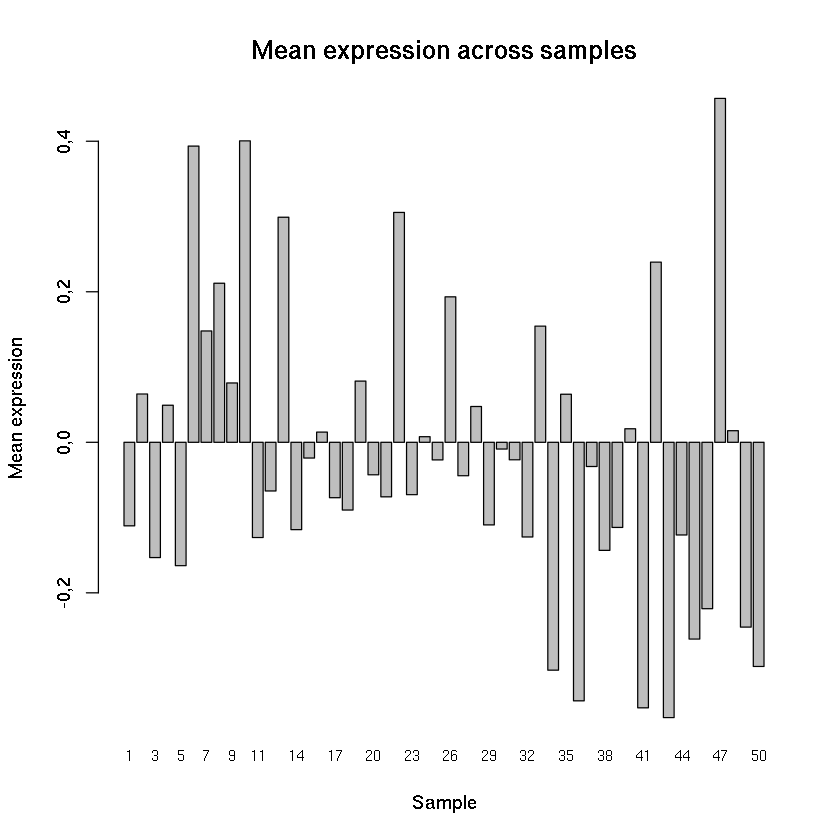

In [26]:
# Visualise mean expression per sample
barplot(meanExpressionBySample,
        xlab = "Sample", ylab = "Mean expression",
        main ="Mean expression across samples",
        names.arg = c(1:50), cex.names = 0.7
       )

In [27]:
# Calculate the variances of the genes and the number of present entries
variancedatExpr = as.vector(apply(as.matrix(datExpr),2,var, na.rm=T))
no.presentdatExpr = as.vector(apply(!is.na(as.matrix(datExpr)),2, sum) )
# Another way of summarizing the number of pressent entries
table(no.presentdatExpr) # simulated data so all genes will be selected.

no.presentdatExpr
  50 
3000 

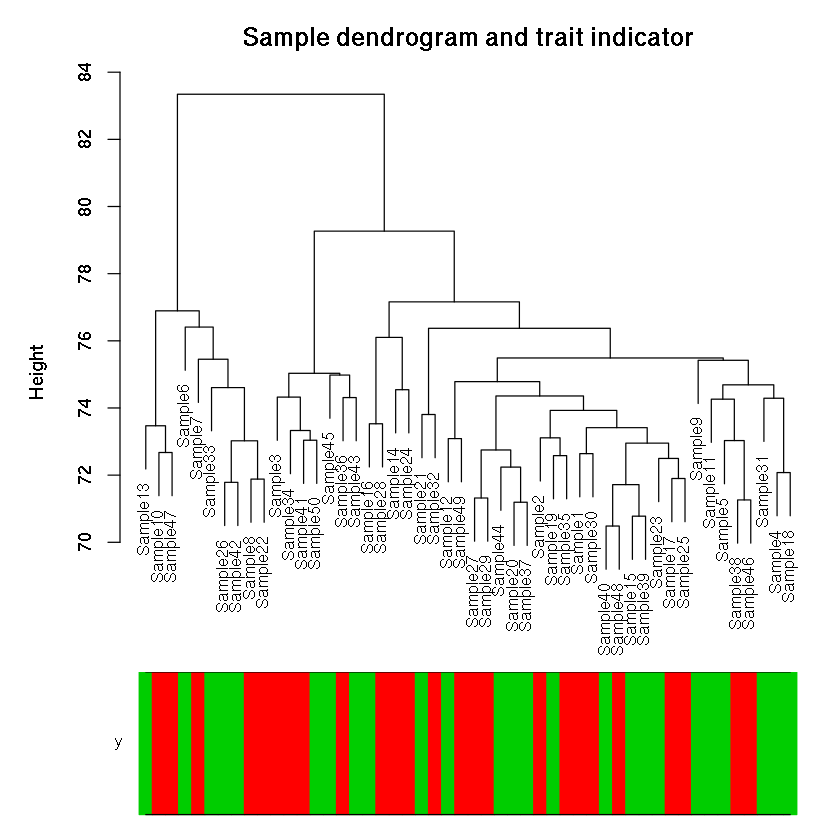

In [28]:
plotClusterTreeSamples(datExpr=datExpr, y=y)

In [29]:
help(plotClusterTreeSamples)

In [34]:
abs(cor(datExpr, use="p"))^6

,Gene1,Gene2,Gene3,Gene4,Gene5,Gene6,Gene7,Gene8,Gene9,Gene10,⋯,Gene2991,Gene2992,Gene2993,Gene2994,Gene2995,Gene2996,Gene2997,Gene2998,Gene2999,Gene3000
Gene1,"1,0000000","0,4860079","0,4422964","0,42817982","0,26250137","0,43899378","0,35571631","0,4468207","0,33703191","0,36047957",⋯,"4,219892e-06","8,082023e-06","1,074854e-05","3,802567e-04","3,313371e-05","6,899781e-09","2,306703e-08","0,0195354532","1,695433e-06","5,167966e-09"
Gene2,"0,4860079","1,0000000","0,3261100","0,34434095","0,39927394","0,47605227","0,23266535","0,4038094","0,29498475","0,35505737",⋯,"5,211060e-06","1,567141e-05","2,351890e-04","9,057164e-04","1,478367e-04","1,830579e-09","1,600946e-07","0,0113760802","1,133287e-07","7,492235e-06"
Gene3,"0,4422964","0,3261100","1,0000000","0,28356092","0,24842551","0,36389157","0,24641425","0,3447667","0,32174362","0,16265882",⋯,"4,461412e-07","1,177623e-04","2,560622e-05","5,259264e-06","3,355752e-04","2,178448e-05","3,181890e-06","0,0116883942","1,122558e-06","3,123801e-07"
Gene4,"0,4281798","0,3443410","0,2835609","1,00000000","0,29511664","0,23751848","0,25582952","0,2884951","0,34573144","0,21215955",⋯,"3,602244e-09","8,384677e-06","1,116596e-04","8,862548e-04","8,634833e-05","4,189966e-09","3,384586e-06","0,0172010542","6,644979e-07","7,333281e-07"
Gene5,"0,2625014","0,3992739","0,2484255","0,29511664","1,00000000","0,37185207","0,25387809","0,2799975","0,24520074","0,17106372",⋯,"4,377827e-07","7,201554e-06","4,481484e-05","1,532656e-03","6,449369e-07","4,912436e-09","1,296060e-04","0,0066030791","6,622958e-06","4,339581e-05"
Gene6,"0,4389938","0,4760523","0,3638916","0,23751848","0,37185207","1,00000000","0,26315960","0,3447432","0,25518909","0,33902626",⋯,"5,451120e-06","9,389678e-05","4,562162e-05","5,262005e-04","6,774859e-05","1,604180e-07","3,375424e-07","0,0186591672","1,062388e-06","1,631272e-05"
Gene7,"0,3557163","0,2326653","0,2464142","0,25582952","0,25387809","0,26315960","1,00000000","0,2835988","0,23561077","0,18415001",⋯,"1,056900e-05","3,765656e-07","3,708127e-04","2,926344e-05","1,413959e-06","5,309689e-07","7,143819e-07","0,0046161329","3,044622e-10","5,873695e-06"
Gene8,"0,4468207","0,4038094","0,3447667","0,28849508","0,27999746","0,34474325","0,28359884","1,0000000","0,23465283","0,30811288",⋯,"1,186459e-07","8,012829e-04","2,401091e-05","1,496076e-04","1,289734e-05","1,539573e-06","2,996818e-06","0,0091796791","1,619386e-08","1,351117e-12"
Gene9,"0,3370319","0,2949847","0,3217436","0,34573144","0,24520074","0,25518909","0,23561077","0,2346528","1,00000000","0,23207855",⋯,"8,306117e-06","4,326300e-06","4,681977e-10","6,430487e-05","1,448801e-03","1,483587e-09","3,524424e-06","0,0083052154","3,614012e-05","1,651987e-07"
Gene10,"0,3604796","0,3550574","0,1626588","0,21215955","0,17106372","0,33902626","0,18415001","0,3081129","0,23207855","1,00000000",⋯,"1,197586e-10","4,754163e-05","5,875463e-05","4,608545e-04","4,334424e-05","3,106977e-10","1,734097e-06","0,0144457426","6,273801e-06","1,860688e-09"


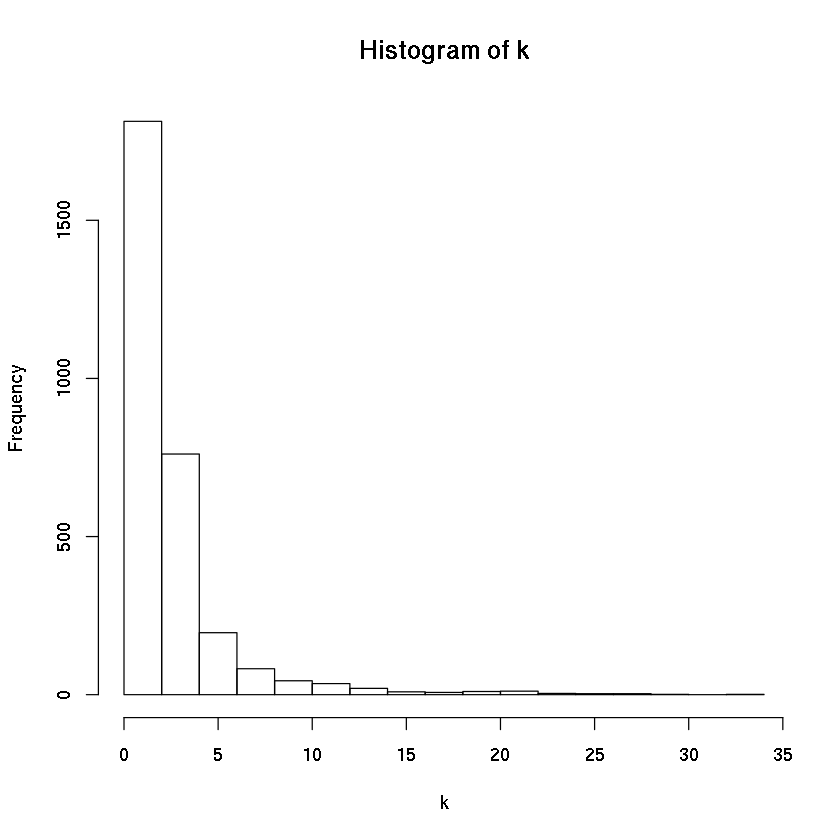

scaleFreeRsquared,slope
"0,94","-2,59"


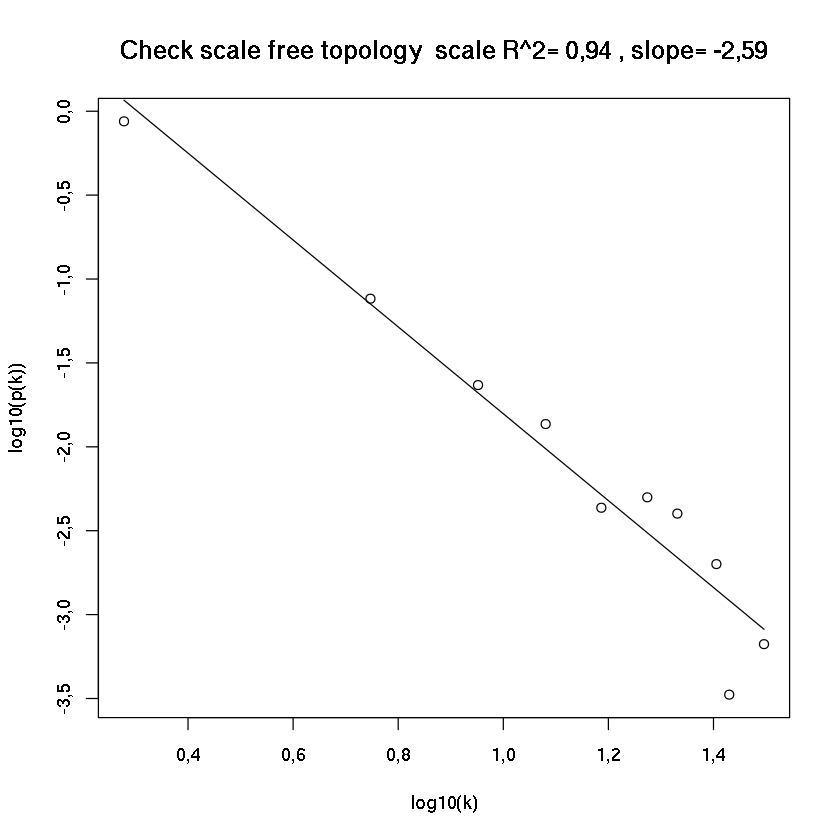

In [30]:
# here we define the adjacency matrix using soft thresholding with beta=6
ADJ1=abs(cor(datExpr, use="p"))^6
# When you have relatively few genes (<5000) use the following code
k=as.vector(apply(ADJ1, 2, sum, na.rm=T))
# When you have a lot of genes use the following code
#k=softConnectivity(datE=datExpr,power=6) # We have 3000.
# Plot a histogram of k and a scale free topology plot
hist(k)
scaleFreePlot(k, main="Check scale free topology")

In [35]:
# We restrict our analysis to only the top 3600 connected geens.
datExpr=datExpr[, rank(-k,ties.method="first" )<=3600]

### Comparing various module detection methods

In [37]:
# Turn adjacency into a measure of dissimilarity
dissADJ=1-ADJ1

In [38]:
# Using topological overlap to define dissimilarity.
dissTOM=TOMdist(ADJ1)

..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


### Average linkage hierachical clustering with adjacency-based dissimilarity

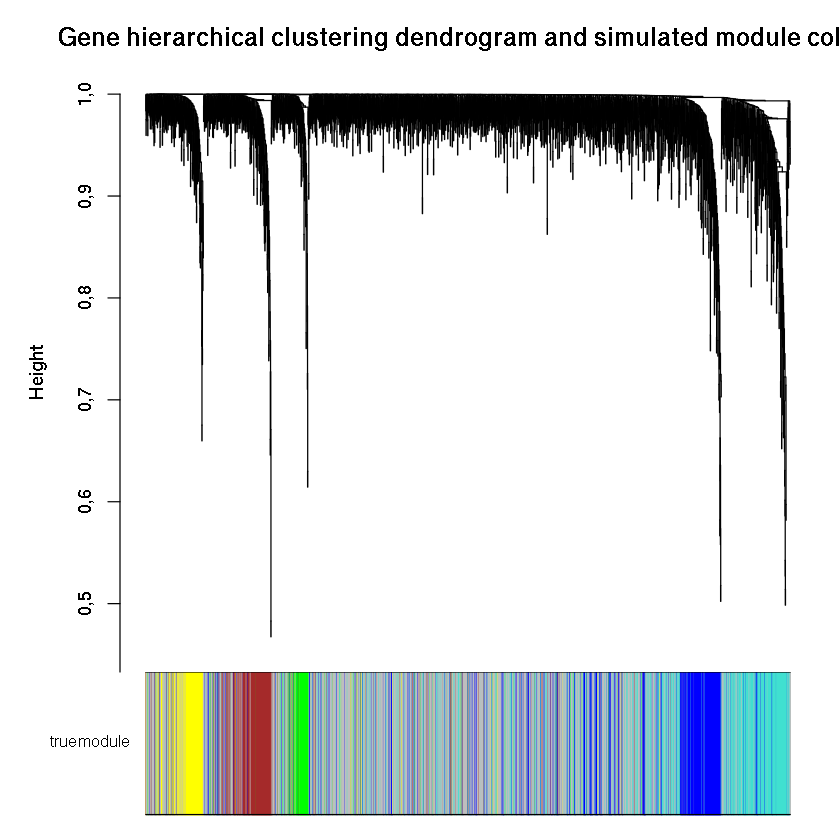

In [41]:
hierADJ=hclust(as.dist(dissADJ), method="average" )
# Plot the resulting clustering tree together with the true color assignment
plotDendroAndColors(hierADJ, colors = data.frame(truemodule), dendroLabels = FALSE, hang=0.03,
                    main = "Gene hierarchical clustering dendrogram and simulated module colors" )

### Module definition via fixed height cut-off

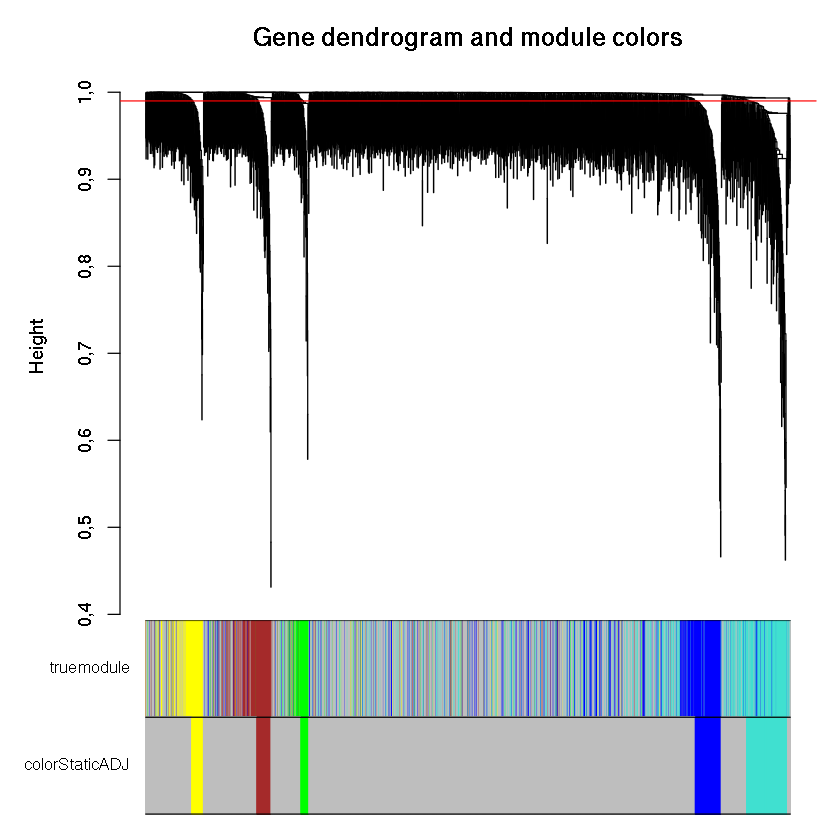

In [48]:
colorStaticADJ=as.character(cutreeStaticColor(hierADJ, cutHeight=.99, minSize=20))
# Plot the dendrogram with module colors
plotDendroAndColors(hierADJ, colors = data.frame(truemodule, colorStaticADJ),
dendroLabels = FALSE, abHeight = 0.99,
main = "Gene dendrogram and module colors")

In [49]:
branch.number=cutreeDynamic(hierADJ,method="tree")
# This function transforms the branch numbers into colors
colorDynamicADJ=labels2colors(branch.number)
colorDynamicHybridADJ=labels2colors(cutreeDynamic(hierADJ,distM= dissADJ,
cutHeight = 0.998, deepSplit=2, pamRespectsDendro = FALSE))

 ..done.


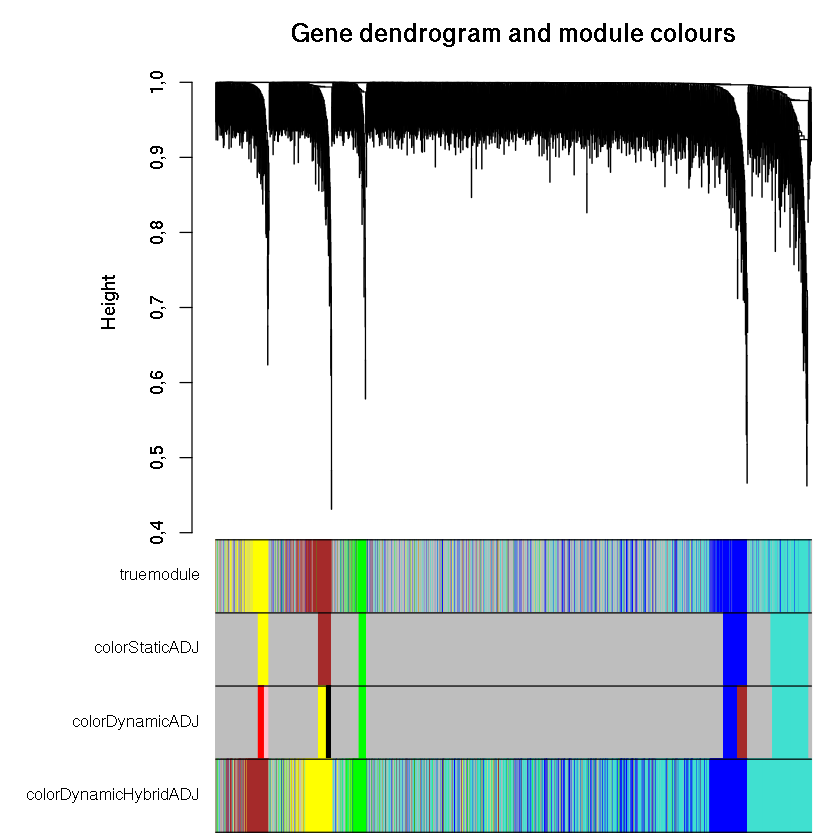

In [50]:
# Plot results of all module detection methods together:
plotDendroAndColors(dendro = hierADJ,
colors=data.frame(truemodule, colorStaticADJ,
colorDynamicADJ, colorDynamicHybridADJ),
dendroLabels = FALSE, marAll = c(0.2, 8, 2.7, 0.2),
main = "Gene dendrogram and module colours")

### Module definition using the topological overlap based dissimilarity

 ..done.


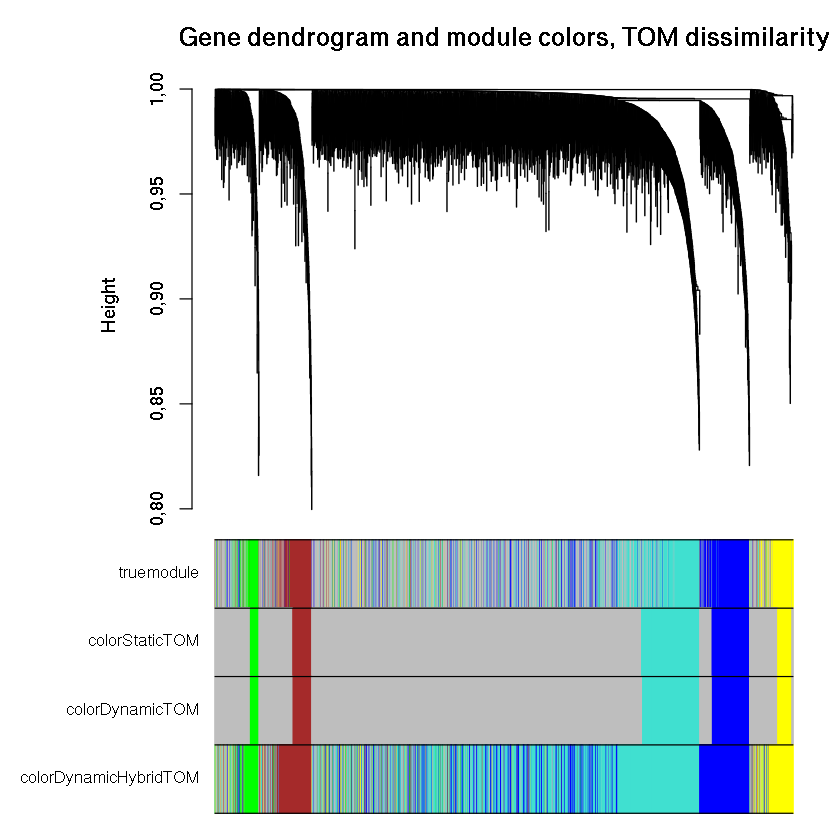

In [54]:
# Calculate the dendrogram
hierTOM = hclust(as.dist(dissTOM),method="average");
# The reader should vary the height cut-off parameter h1
# (related to the y-axis of dendrogram) in the following
colorStaticTOM = as.character(cutreeStaticColor(hierTOM, cutHeight=.99, minSize=20))
colorDynamicTOM = labels2colors (cutreeDynamic(hierTOM,method="tree"))
colorDynamicHybridTOM = labels2colors(cutreeDynamic(hierTOM, distM= dissTOM , cutHeight=0.998,
deepSplit=2, pamRespectsDendro = FALSE))
# Now we plot the results
plotDendroAndColors(hierTOM,
colors=data.frame(truemodule, colorStaticTOM,
colorDynamicTOM, colorDynamicHybridTOM),
dendroLabels = FALSE, marAll = c(1, 8, 3, 1),
main = "Gene dendrogram and module colors, TOM dissimilarity")